# Unsupervised Learning Project

### Author - Manoj Mariappan

### Data Pre-Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [3]:
Vh = pd.read_csv('Data/vehicle.csv')
print(Vh.shape)
Vh.head(10)

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


#### our target variable is class and now lets see how many different outcomes are in our target variables

In [4]:
print("The distribution of our Target Variable")
print("<==========================================>")
Vh["class"].value_counts()

The distribution of our Target Variable
<==========================================>


car    429
bus    218
van    199
Name: class, dtype: int64

#### we have 3 types of outcomes which are Car, Bus and Van

In [5]:
Vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### The datatypes here seens to be most of numerical values except for the target variable which is an object

In [6]:
Vh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


#### from the five point description we can notice that in all the columns except for scaled_variance.1  mean and median are almost same or very close so there seems to be no skewness in the data.
#### Standard Deviation is some what high in the columns.

### Checking for Null Values

In [7]:
print("Null or empty values present in our data")
print("<===========================================>")
Vh.isnull().sum()

Null or empty values present in our data
<===========================================>


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### The method im using here to handle missing values is to Replace them with the median values of the respective features

In [8]:
Vh_bus = Vh[Vh['class'] == 'bus']
Vh_bus.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
12,88,46.0,74.0,171.0,68.0,6,152.0,43.0,19.0,148,180.0,349.0,192.0,71.0,5.0,11.0,189.0,195,bus
14,94,49.0,79.0,203.0,71.0,5,174.0,37.0,21.0,154,196.0,465.0,206.0,71.0,6.0,2.0,197.0,199,bus


In [9]:
Vh_car = Vh[Vh['class'] == 'car']
Vh_car.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202,car
15,96,55.0,103.0,201.0,65.0,9,204.0,32.0,23.0,166,227.0,624.0,246.0,74.0,6.0,2.0,186.0,194,car
18,104,54.0,100.0,186.0,61.0,10,216.0,31.0,24.0,173,225.0,686.0,220.0,74.0,5.0,11.0,185.0,195,car


In [10]:
Vh_van = Vh[Vh['class'] == 'van']
Vh_van.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van


In [11]:
print("number of null values in bus")
print("<=====================================>")
print(Vh_bus.isnull().sum())
print("<=====================================>")
print("number of null values in car")
print("<=====================================>")
print(Vh_car.isnull().sum())
print("<=====================================>")
print("number of null values in van")
print("<=====================================>")
print(Vh_van.isnull().sum())

number of null values in bus
<=====================================>
compactness                    0
circularity                    4
distance_circularity           3
radius_ratio                   2
pr.axis_aspect_ratio           1
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         1
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    1
skewness_about                 4
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
<=====================================>
number of null values in car
<=====================================>
compactness                    0
circularity                    1
distance_circularity           0
radius_ratio                   3
pr.axis_aspect_ratio           1
max.length_aspect

In [12]:
print("Median Values of The features which will be used for replacing the null values")
print("<=====================================>")
print("Median values in bus")
print("<=====================================>")
print(Vh_bus.median())
print("<=====================================>")
print("Median values in car")
print("<=====================================>")
print(Vh_car.median())
print("<=====================================>")
print("Median values in van")
print("<=====================================>")
print(Vh_van.median())

Median Values of The features which will be used for replacing the null values
<=====================================>
Median values in bus
<=====================================>
compactness                     89.0
circularity                     44.0
distance_circularity            72.0
radius_ratio                   167.5
pr.axis_aspect_ratio            64.0
max.length_aspect_ratio          6.0
scatter_ratio                  152.0
elongatedness                   44.0
pr.axis_rectangularity          19.0
max.length_rectangularity      145.0
scaled_variance                177.0
scaled_variance.1              344.0
scaled_radius_of_gyration      176.0
scaled_radius_of_gyration.1     76.0
skewness_about                   5.0
skewness_about.1                10.0
skewness_about.2               186.0
hollows_ratio                  189.0
dtype: float64
<=====================================>
Median values in car
<=====================================>
compactness                     97.0
c

In [13]:
Vh_bus.fillna(Vh_bus.median(),inplace = True)
Vh_car.fillna(Vh_car.median(),inplace = True)
Vh_van.fillna(Vh_van.median(),inplace = True)

For better accuracy in prediction, the missing values in the features are filled with the medians of their respective classes.

In [14]:
print("<=====================================>")
print("number of null values in bus")
print("<=====================================>")
print(Vh_bus.isnull().sum())
print("<=====================================>")
print("number of null values in car")
print("<=====================================>")
print(Vh_car.isnull().sum())
print("<=====================================>")
print("number of null values in van")
print("<=====================================>")
print(Vh_van.isnull().sum())

<=====================================>
number of null values in bus
<=====================================>
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
<=====================================>
number of null values in car
<=====================================>
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_as

#### All the null values have been replaced with the median value of the respective columns and from above we can see that there are no more missing values in our table
Now lets combine all the classes into the same dataframe

In [15]:
Vh_C = pd.concat([Vh_bus, Vh_car], axis=0)
print("<=====================================>")
print("Shape of The data frame after combining bus and car data")
print("<=====================================>")
print(Vh_C.shape)

Vh_C = pd.concat([Vh_C, Vh_van], axis=0)
print("<=====================================>")
print("Shape of The data frame after combining bus, car and van data")
print("<=====================================>")
print(Vh_C.shape)
Vh_C = Vh_C.sort_index(axis=0)
Vh_C.head(10)

<=====================================>
Shape of The data frame after combining bus and car data
<=====================================>
(647, 19)
<=====================================>
Shape of The data frame after combining bus, car and van data
<=====================================>
(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,186.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


The distribution of our Target Variable with visualization
<==========================================================>
car    429
bus    218
van    199
Name: class, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


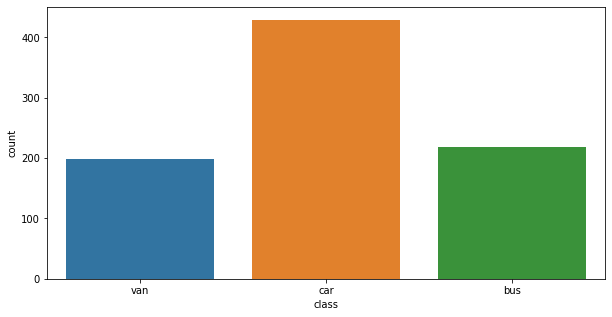

In [16]:
print("The distribution of our Target Variable with visualization")
print("<==========================================================>")
print(Vh_C["class"].value_counts())
plt.figure(figsize = (10,5))
print(sns.countplot(x='class',data=Vh_C))
plt.show()

Here the target column is converted to labels using label encoder

In [17]:
LabEn  = LabelEncoder()
columns = Vh_C.columns
Vh_C['class'] = LabEn.fit_transform(Vh_C['class'])

print(Vh_C["class"].value_counts())
Vh_C.head(10)

1    429
0    218
2    199
Name: class, dtype: int64


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,2
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,2
9,93,44.0,98.0,186.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,1


#### 0 -  bus, 1 - car, 2 - van our Label encoding is successfull

#### Almost the features are normally distributed except for a very few.

In [20]:
outliers = []
for col in Vh_C.columns[:-1]:
    Q1 = np.percentile(a= Vh_C[col], q = 25)
    Q3 = np.percentile(a= Vh_C[col], q = 75)
    
    IQR = Q3-Q1
    ul = Q3 + (1.5*IQR)
    ll = Q1 - (1.5*IQR)
    
    print("outlier in feature: "+col+"(" + str(len(Vh_C[(Vh_C[col]>ul) | (Vh_C[col]<ll)]))+")")
    display(Vh_C[(Vh_C[col]>ul) | (Vh_C[col]<ll)])
    outliers = outliers + list(Vh_C[(Vh_C[col]>ul) | (Vh_C[col]<ll)].index.values)

outlier in feature: compactness(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: circularity(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: distance_circularity(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: radius_ratio(3)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


outlier in feature: pr.axis_aspect_ratio(8)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,2
706,82,43.0,70.0,250.0,105.0,55,139.0,48.0,18.0,145,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199,2


outlier in feature: max.length_aspect_ratio(13)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
127,85,41.0,66.0,155.0,65.0,22,149.0,45.0,19.0,139,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2
391,91,38.0,70.0,160.0,66.0,25,140.0,47.0,18.0,139,162.0,296.0,130.0,67.0,4.0,11.0,192.0,202,2
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,2
544,88,43.0,70.0,177.0,74.0,19,152.0,44.0,19.0,143,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189,0


outlier in feature: scatter_ratio(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: elongatedness(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: pr.axis_rectangularity(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: max.length_rectangularity(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: scaled_variance(1)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


outlier in feature: scaled_variance.1(2)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
85,110,58.0,106.0,180.0,51.0,6,261.0,26.0,28.0,171,278.0,998.0,257.0,83.0,9.0,13.0,181.0,182,0
835,111,58.0,105.0,183.0,51.0,6,265.0,26.0,29.0,174,285.0,1018.0,255.0,85.0,4.0,8.0,181.0,183,0


outlier in feature: scaled_radius_of_gyration(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: scaled_radius_of_gyration.1(15)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,2
47,85,42.0,66.0,122.0,54.0,6,148.0,46.0,19.0,141,172.0,317.0,174.0,88.0,6.0,14.0,180.0,182,0
79,89,44.0,68.0,113.0,50.0,7,150.0,45.0,19.0,147,171.0,328.0,189.0,88.0,6.0,5.0,179.0,182,0
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,0
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,2
230,85,35.0,47.0,110.0,55.0,3,117.0,57.0,17.0,122,136.0,203.0,139.0,89.0,5.0,9.0,180.0,184,2
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,2
381,106,54.0,100.0,227.0,67.0,4,250.0,27.0,27.0,162,280.0,923.0,262.0,88.0,5.0,11.0,182.0,182,0
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,2


outlier in feature: skewness_about(12)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
44,119,54.0,106.0,220.0,65.0,12,213.0,31.0,24.0,167,223.0,675.0,232.0,66.0,20.0,1.0,192.0,202,1
113,88,35.0,50.0,121.0,58.0,5,114.0,59.0,17.0,122,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187,1
123,90,36.0,57.0,130.0,57.0,6,121.0,56.0,17.0,127,137.0,216.0,132.0,68.0,22.0,23.0,190.0,195,1
190,97,48.0,94.0,198.0,63.0,9,181.0,36.0,21.0,155,200.0,494.0,189.0,64.0,20.0,11.0,199.0,203,1
346,117,52.0,110.0,228.0,65.0,12,212.0,31.0,24.0,163,228.0,668.0,220.0,66.0,21.0,25.0,194.0,205,1
400,107,53.0,108.0,213.0,64.0,12,206.0,32.0,23.0,163,216.0,627.0,202.0,65.0,21.0,22.0,194.0,205,1
505,115,53.0,100.0,205.0,64.0,11,220.0,30.0,25.0,166,229.0,710.0,214.0,71.0,21.0,11.0,189.0,199,1
516,92,42.0,75.0,172.0,60.0,8,147.0,45.0,19.0,142,174.0,322.0,160.0,62.0,22.0,10.0,206.0,211,1
623,106,52.0,108.0,207.0,64.0,12,221.0,31.0,25.0,168,229.0,709.0,200.0,73.0,22.0,38.0,190.0,205,1
761,115,51.0,100.0,201.0,60.0,12,196.0,34.0,23.0,162,207.0,573.0,184.0,62.0,22.0,1.0,198.0,208,1


outlier in feature: skewness_about.1(1)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
132,97,42.0,101.0,186.0,59.0,9,186.0,36.0,22.0,138,208.0,511.0,168.0,67.0,7.0,41.0,194.0,206,1


outlier in feature: skewness_about.2(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


outlier in feature: hollows_ratio(0)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


Lets view the box plot of every feature that has outliers in it

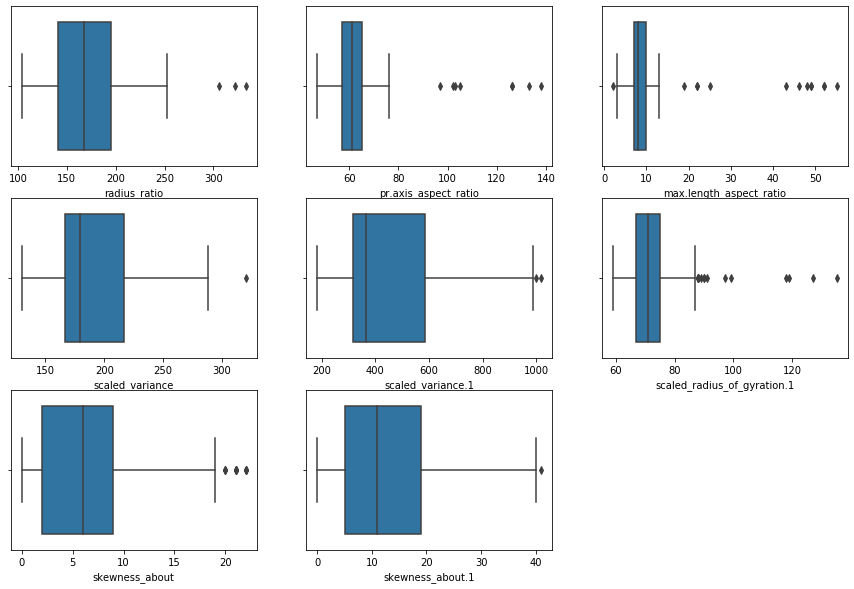

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x = Vh_C['radius_ratio'])
plt.subplot(3,3,2)
sns.boxplot(x = Vh_C['pr.axis_aspect_ratio'])
plt.subplot(3,3,3)
sns.boxplot(x = Vh_C['max.length_aspect_ratio'])
plt.subplot(3,3,4)
sns.boxplot(x = Vh_C['scaled_variance'])
plt.subplot(3,3,5)
sns.boxplot(x = Vh_C['scaled_variance.1'])
plt.subplot(3,3,6)
sns.boxplot(x = Vh_C['scaled_radius_of_gyration.1'])
plt.subplot(3,3,7)
sns.boxplot(x = Vh_C['skewness_about'])
plt.subplot(3,3,8)
sns.boxplot(x = Vh_C['skewness_about.1'])
plt.show()

#### There seems to be outliers in the data from the above box plot. lets check for the presence of outliers and handle them
i will be calculating the iqr of each feature and figure out the presence of outliers

In [22]:
Q1 = np.percentile(a= Vh_C['radius_ratio'], q = 25)
Q3 = np.percentile(a= Vh_C['radius_ratio'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['radius_ratio'][Vh_C['radius_ratio']<ll] = ll
Vh_C['radius_ratio'][Vh_C['radius_ratio']>ul] = ul

##########################################################################################
Q1 = np.percentile(a= Vh_C['pr.axis_aspect_ratio'], q = 25)
Q3 = np.percentile(a= Vh_C['pr.axis_aspect_ratio'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['pr.axis_aspect_ratio'][Vh_C['pr.axis_aspect_ratio']<ll] = ll
Vh_C['pr.axis_aspect_ratio'][Vh_C['pr.axis_aspect_ratio']>ul] = ul

############################################################################################
Q1 = np.percentile(a= Vh_C['max.length_aspect_ratio'], q = 25)
Q3 = np.percentile(a= Vh_C['max.length_aspect_ratio'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['max.length_aspect_ratio'][Vh_C['max.length_aspect_ratio']<ll] = ll
Vh_C['max.length_aspect_ratio'][Vh_C['max.length_aspect_ratio']>ul] = ul

############################################################################################
Q1 = np.percentile(a= Vh_C['scaled_variance'], q = 25)
Q3 = np.percentile(a= Vh_C['scaled_variance'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['scaled_variance'][Vh_C['scaled_variance']<ll] = ll
Vh_C['scaled_variance'][Vh_C['scaled_variance']>ul] = ul

##########################################################################################
Q1 = np.percentile(a= Vh_C['scaled_variance.1'], q = 25)
Q3 = np.percentile(a= Vh_C['scaled_variance.1'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['scaled_variance.1'][Vh_C['scaled_variance.1']<ll] = ll
Vh_C['scaled_variance.1'][Vh_C['scaled_variance.1']>ul] = ul

##########################################################################################
Q1 = np.percentile(a= Vh_C['scaled_radius_of_gyration.1'], q = 25)
Q3 = np.percentile(a= Vh_C['scaled_radius_of_gyration.1'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['scaled_radius_of_gyration.1'][Vh_C['scaled_radius_of_gyration.1']<ll] = ll
Vh_C['scaled_radius_of_gyration.1'][Vh_C['scaled_radius_of_gyration.1']>ul] = ul

##########################################################################################
Q1 = np.percentile(a= Vh_C['skewness_about'], q = 25)
Q3 = np.percentile(a= Vh_C['skewness_about'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['skewness_about'][Vh_C['skewness_about']<ll] = ll
Vh_C['skewness_about'][Vh_C['skewness_about']>ul] = ul

##########################################################################################
Q1 = np.percentile(a= Vh_C['skewness_about.1'], q = 25)
Q3 = np.percentile(a= Vh_C['skewness_about.1'], q = 75)
    
IQR = Q3-Q1
ul = Q3 + (1.5*IQR)
ll = Q1 - (1.5*IQR)
    
Vh_C['skewness_about.1'][Vh_C['skewness_about.1']<ll] = ll
Vh_C['skewness_about.1'][Vh_C['skewness_about.1']>ul] = ul

##########################################################################################

##### The above features have outliers and they are not removed but instead outlier capping is used and replaced by the upper limit and lower limit respectively

#### After Cleaning the Outliers our Data looks like this with 813 records on it. 
#### Lets Check for outliers again

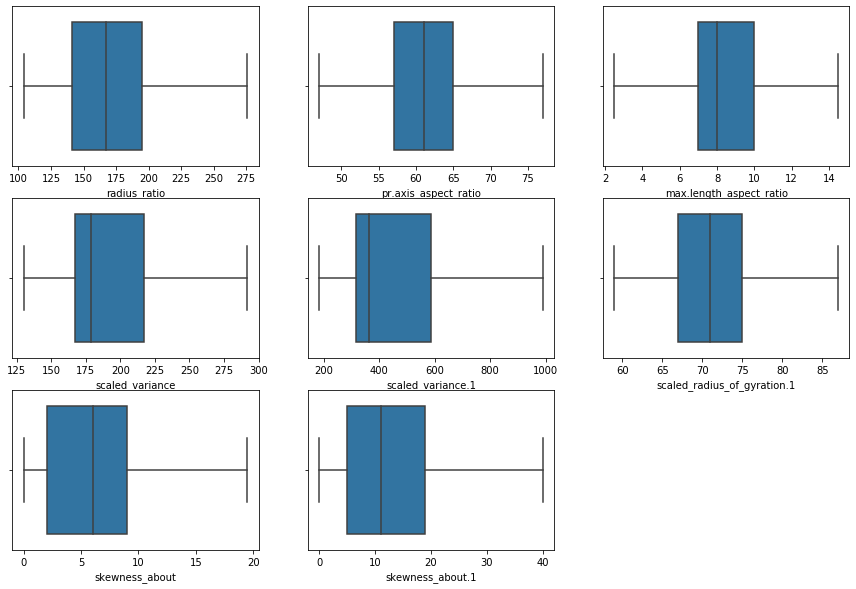

In [23]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x = Vh_C['radius_ratio'])
plt.subplot(3,3,2)
sns.boxplot(x = Vh_C['pr.axis_aspect_ratio'])
plt.subplot(3,3,3)
sns.boxplot(x = Vh_C['max.length_aspect_ratio'])
plt.subplot(3,3,4)
sns.boxplot(x = Vh_C['scaled_variance'])
plt.subplot(3,3,5)
sns.boxplot(x = Vh_C['scaled_variance.1'])
plt.subplot(3,3,6)
sns.boxplot(x = Vh_C['scaled_radius_of_gyration.1'])
plt.subplot(3,3,7)
sns.boxplot(x = Vh_C['skewness_about'])
plt.subplot(3,3,8)
sns.boxplot(x = Vh_C['skewness_about.1'])
plt.show()

##### The outliers have been cleaned and replaced and there are no more outliers

### Understanding The attributes

In [24]:
Vh_C.shape

(846, 19)

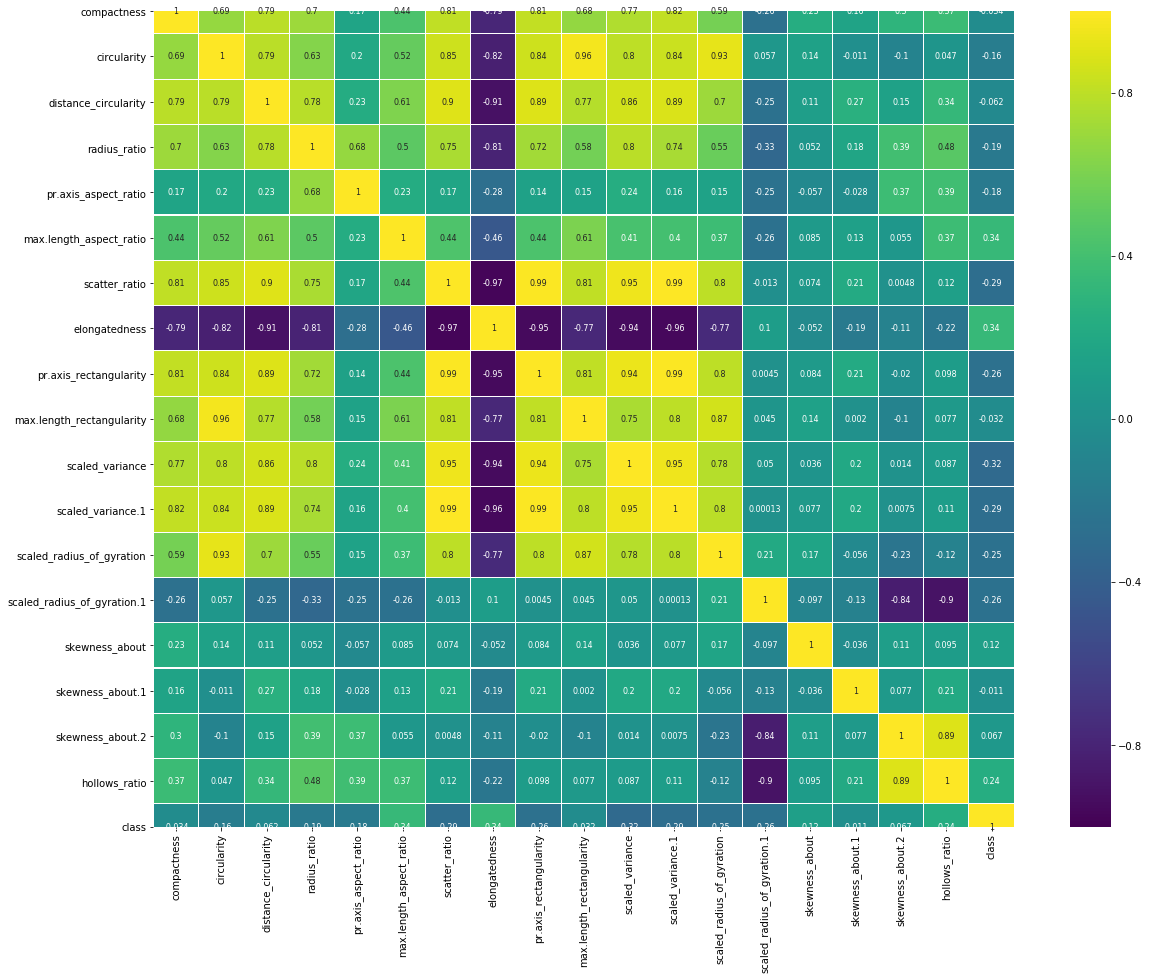

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(Vh_C.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

In [26]:
X = Vh_C.drop(['class'],axis = 1)
y = Vh_C['class']

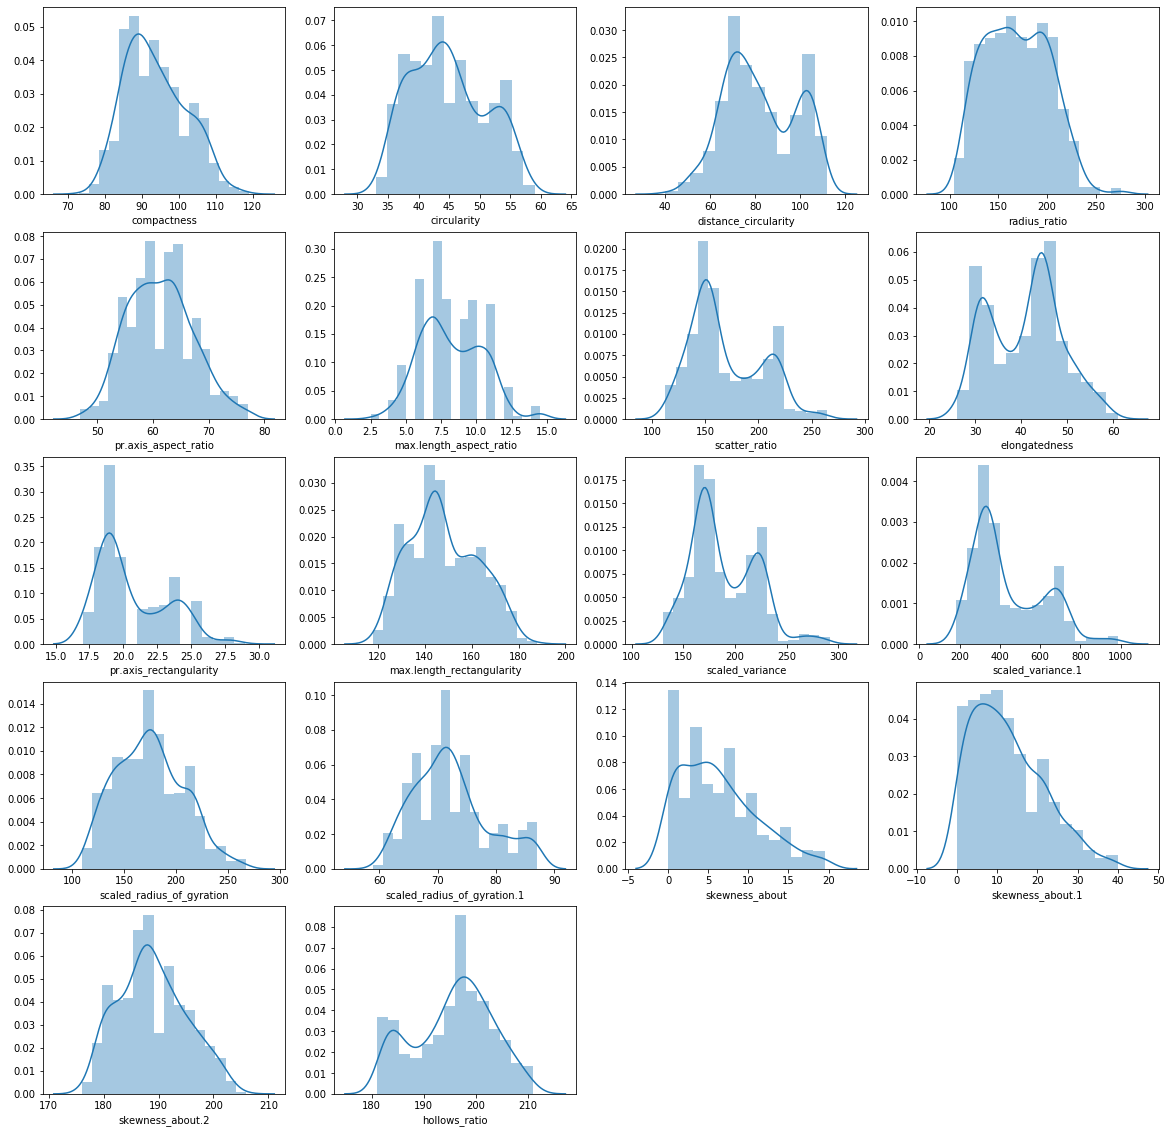

In [27]:
#plt.style.use('seaborn-whitegrid')
#Vh_C.hist(bins = 20, figsize=(300,225),edgecolor = 'black')
#plt.show()

features=[col for col in X.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(features,start=1):
    plt.subplot(5,4,i);
    sns.distplot(Vh_C[col])
plt.show()

- almost all the data looks normal 
- skewness_about, skewness_about, scaled variance.1 seems a little skewed.

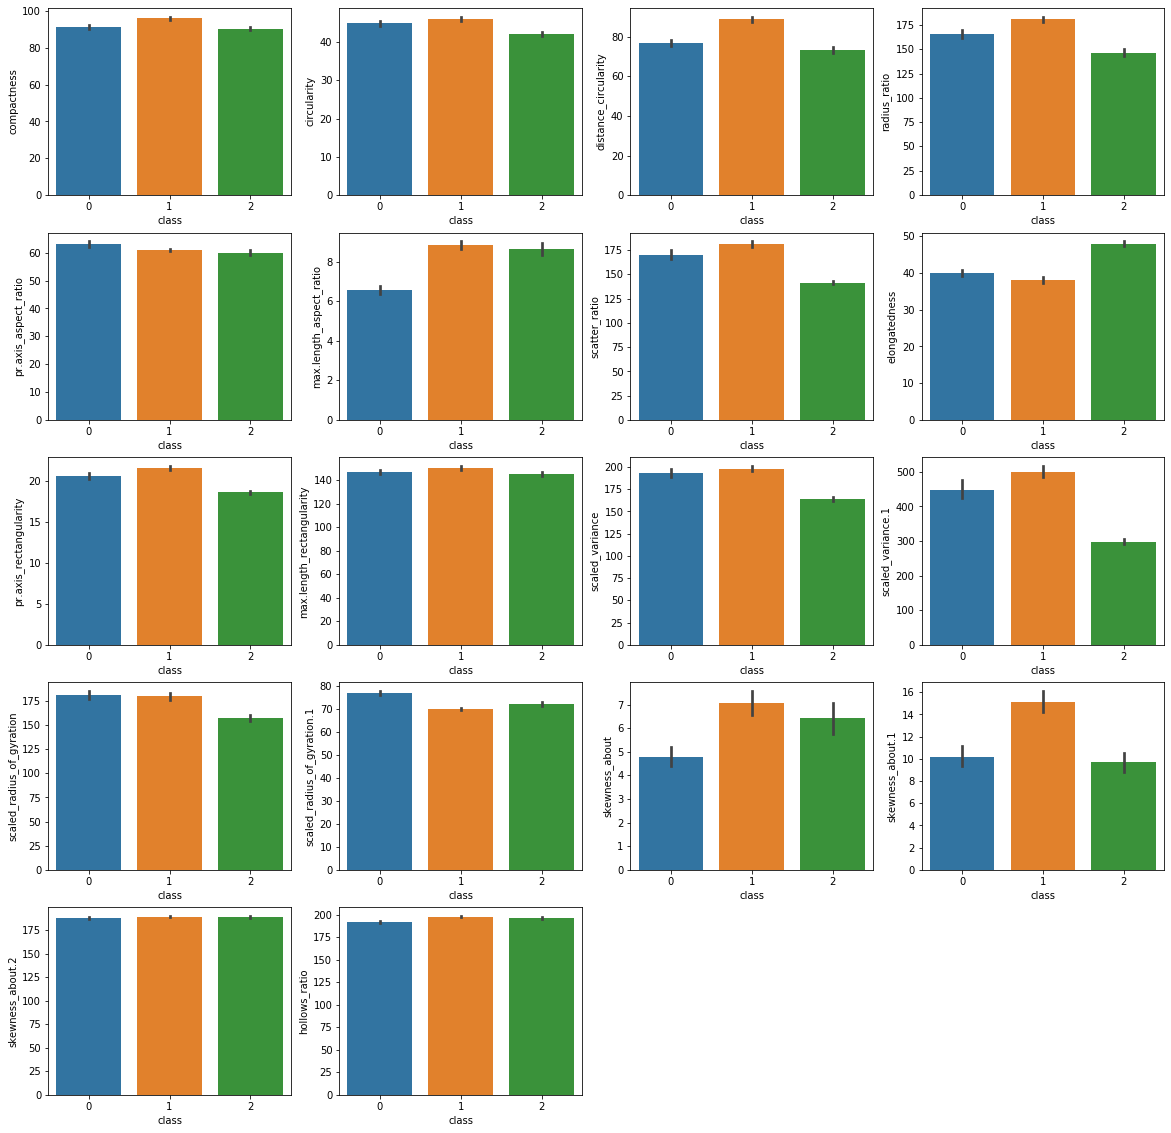

In [28]:
plt.figure(figsize=(20,20))
for i,col in enumerate(features,start=1):
    plt.subplot(5,4,i);
    sns.barplot(x = y, y = X[col], data = X);
plt.show()

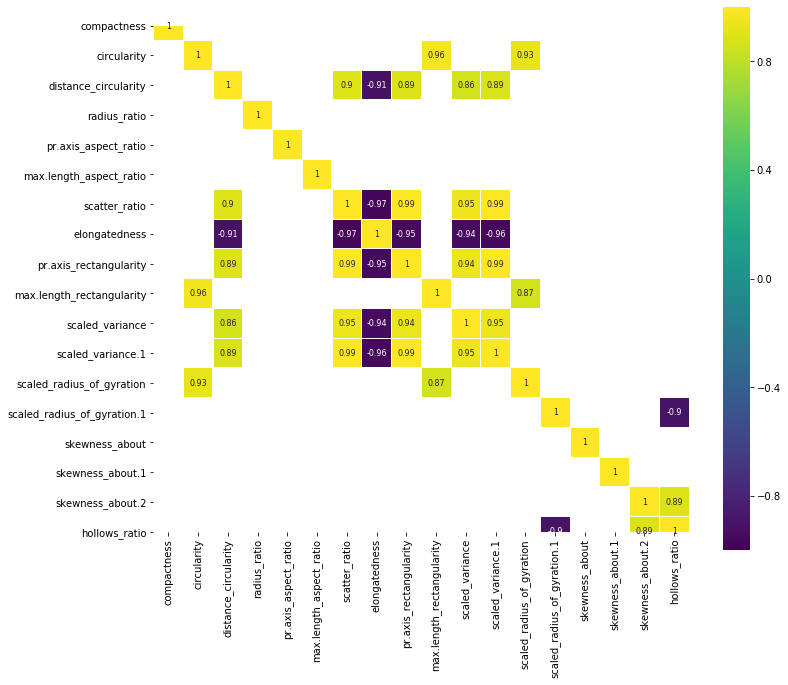

In [29]:
corr = X.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.85) | (corr <= -0.85)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

There are multiple features which are highly co-related to each other. This leads to multicolinearity, which leads to the same information with too much features to compute makes it very expensive. 

- we will use linear model and see the features which can be droped based on the importance.
- we will be tuning the parameter C which gives takes the regularization values.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

                             importance
name                                   
elongatedness                 -1.419248
hollows_ratio                 -0.512343
scatter_ratio                 -0.418373
radius_ratio                  -0.317966
distance_circularity          -0.251801
compactness                   -0.154444
skewness_about                -0.145724
pr.axis_rectangularity        -0.051259
max.length_aspect_ratio       -0.050463
scaled_radius_of_gyration     -0.005583
max.length_rectangularity      0.021299
scaled_variance.1              0.047690
skewness_about.1               0.058236
scaled_variance                0.181009
circularity                    0.205584
scaled_radius_of_gyration.1    0.209225
skewness_about.2               0.919040
pr.axis_aspect_ratio           0.982161


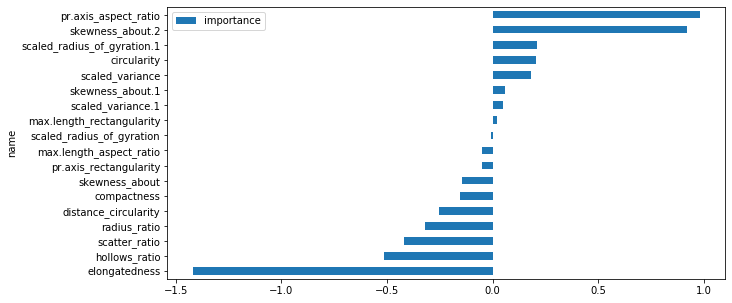

In [31]:
imp_model1 = LogisticRegression(penalty = 'l1', C=10, solver="liblinear", random_state=7)
imp_model1.fit(X,y)
attributes = pd.DataFrame()
attributes['name'] = X.columns
attributes['importance'] = imp_model1.coef_[0]
attributes.set_index('name',inplace = True)
attributes.sort_values(by=['importance'],ascending = True, inplace = True)

print(attributes)
attributes.plot(kind = 'barh',figsize = (10,5))

                             importance
name                                   
elongatedness                 -1.339143
hollows_ratio                 -0.456615
scatter_ratio                 -0.385563
radius_ratio                  -0.303334
distance_circularity          -0.243856
compactness                   -0.143897
skewness_about                -0.134983
max.length_aspect_ratio       -0.065245
scaled_radius_of_gyration     -0.001177
pr.axis_rectangularity         0.000000
max.length_rectangularity      0.016655
scaled_variance.1              0.043115
skewness_about.1               0.050020
circularity                    0.173923
scaled_variance                0.174005
scaled_radius_of_gyration.1    0.194479
skewness_about.2               0.833606
pr.axis_aspect_ratio           0.938072


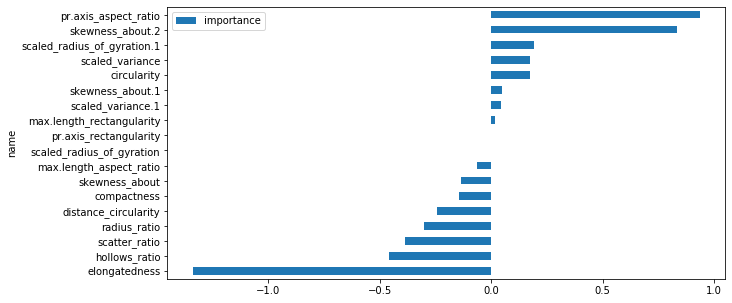

In [33]:
imp_model2 = LogisticRegression(penalty = 'l1',C=1, solver="liblinear", random_state=7)
imp_model2.fit(X,y)
attributes1 = pd.DataFrame()
attributes1['name'] = X.columns
attributes1['importance'] = imp_model2.coef_[0]
attributes1.set_index('name',inplace = True)
attributes1.sort_values(by=['importance'],ascending = True, inplace = True)

print(attributes1)
attributes1.plot(kind = 'barh',figsize = (10,5))

                             importance
name                                   
elongatedness                 -1.262884
hollows_ratio                 -0.428593
scatter_ratio                 -0.352455
radius_ratio                  -0.291134
distance_circularity          -0.236394
compactness                   -0.137165
skewness_about                -0.127386
max.length_aspect_ratio       -0.069467
pr.axis_rectangularity         0.000000
scaled_radius_of_gyration      0.001084
max.length_rectangularity      0.014392
scaled_variance.1              0.039359
skewness_about.1               0.043591
circularity                    0.148951
scaled_variance                0.167753
scaled_radius_of_gyration.1    0.178386
skewness_about.2               0.780444
pr.axis_aspect_ratio           0.902098


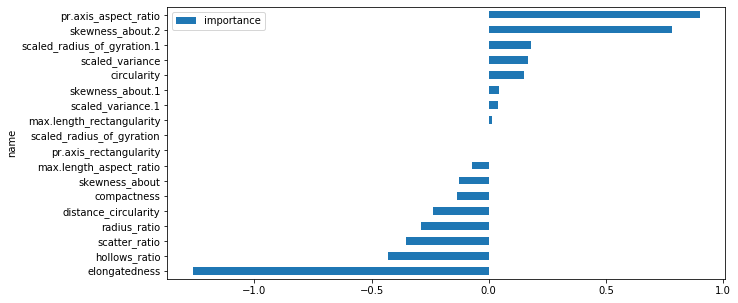

In [34]:
imp_model3 = LogisticRegression(penalty = 'l1', C=.5, solver="liblinear", random_state=7)
imp_model3.fit(X,y)
attributes2 = pd.DataFrame()
attributes2['name'] = X.columns
attributes2['importance'] = imp_model3.coef_[0]
attributes2.set_index('name',inplace = True)
attributes2.sort_values(by=['importance'],ascending = True, inplace = True)

print(attributes2)
attributes2.plot(kind = 'barh',figsize = (10,5))

                             importance
name                                   
elongatedness                 -0.883227
hollows_ratio                 -0.309014
radius_ratio                  -0.233740
distance_circularity          -0.210838
scatter_ratio                 -0.169231
compactness                   -0.100564
skewness_about                -0.093855
max.length_aspect_ratio       -0.075835
circularity                    0.000000
max.length_rectangularity      0.000000
pr.axis_rectangularity         0.000000
skewness_about.1               0.013038
scaled_radius_of_gyration      0.018399
scaled_variance.1              0.018558
scaled_radius_of_gyration.1    0.085818
scaled_variance                0.136085
skewness_about.2               0.533041
pr.axis_aspect_ratio           0.739759


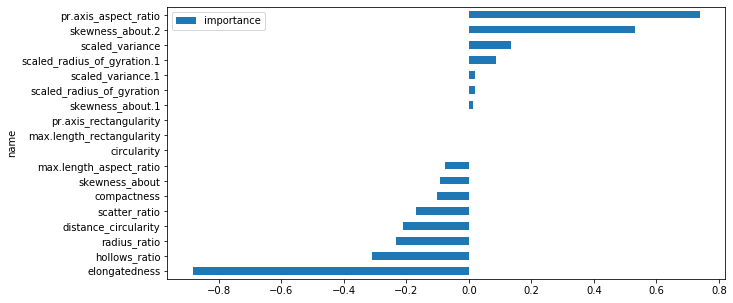

In [35]:
imp_model4 = LogisticRegression(penalty = 'l1', C=.1, solver="liblinear", random_state=7)
imp_model4.fit(X,y)
attributes = pd.DataFrame()
attributes['name'] = X.columns
attributes['importance'] = imp_model4.coef_[0]
attributes.set_index('name',inplace = True)
attributes.sort_values(by=['importance'],ascending = True, inplace = True)

print(attributes)
attributes.plot(kind = 'barh',figsize = (10,5))

                             importance
name                                   
elongatedness                 -0.233967
distance_circularity          -0.181780
radius_ratio                  -0.089160
max.length_aspect_ratio       -0.043610
compactness                   -0.026745
hollows_ratio                 -0.021197
skewness_about                -0.013263
max.length_rectangularity     -0.013105
scatter_ratio                  0.000000
circularity                    0.000000
skewness_about.1               0.000000
pr.axis_rectangularity         0.000000
scaled_radius_of_gyration.1    0.000437
scaled_variance.1              0.002684
scaled_radius_of_gyration      0.013709
skewness_about.2               0.049256
scaled_variance                0.074865
pr.axis_aspect_ratio           0.322561


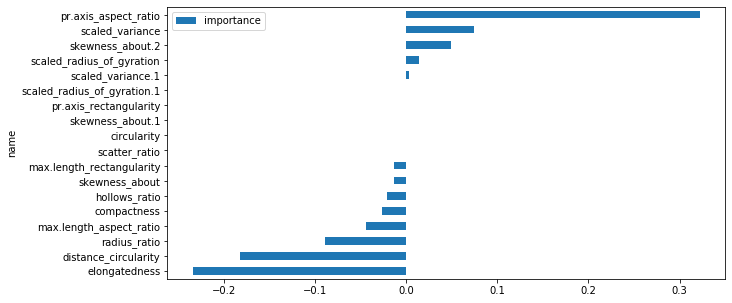

In [36]:
imp_model5 = LogisticRegression(penalty = 'l1', C=.01, solver="liblinear", random_state=7)
imp_model5.fit(X,y)
attributes = pd.DataFrame()
attributes['name'] = X.columns
attributes['importance'] = imp_model5.coef_[0]
attributes.set_index('name',inplace = True)
attributes.sort_values(by=['importance'],ascending = True, inplace = True)

print(attributes)
attributes.plot(kind = 'barh',figsize = (10,5))

We can drop out the features which has importance less than 0.01 and when we go for the Regularization parameter C = 0.1 we can see 4 values with 0 importance and 2 values less than 0.01 importance and we can drop all these 6 features. 
1. scatter_ratio    =               0.000000
2. circularity       =              0.000000
3. skewness_about.1    =            0.000000
4. pr.axis_rectangularity =          0.000000
5. scaled_radius_of_gyration.1 =     0.000437
6. scaled_variance.1            =   0.002684

In [37]:
X_droped = X.drop(["circularity","scatter_ratio","skewness_about.1","pr.axis_rectangularity","scaled_variance.1","scaled_radius_of_gyration"], axis=1)
lr = LogisticRegression(solver="liblinear", random_state=7)
lr.fit(X_droped,y)
print("Accuracy: "+str(lr.score(X_droped,y)))
lrscores = cross_val_score(lr, X_droped, y, cv=5)
print("5-fold cross val avg performance: "+str(lrscores.mean()))

Accuracy: 0.9089834515366431
5-fold cross val avg performance: 0.8960635776827829


- After Dropping 6 features it gives us an accuracy of 90% and k-fold cross validation score of 89.6.

In [38]:
from scipy.stats import zscore

X_scaled=X.apply(zscore)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517682,0.059308,0.281854,1.837887,0.814478,-0.208583,0.137295,-0.223684,0.758332,-0.403707,-0.343955,0.285523,-0.342926,-0.069172,0.380765,-0.312208,0.183957
1,-0.325470,-0.624110,0.122821,-0.846645,-0.740926,0.361007,-0.600383,0.521478,-0.609882,-0.344578,-0.595797,-0.621970,-0.513811,-0.033799,0.551175,0.156598,0.013073,0.452977
2,1.254193,0.843908,1.520094,1.227354,0.806362,0.814478,1.147649,-1.143315,0.934909,0.689401,1.100999,1.108534,1.392295,0.120764,1.585087,-0.403817,-0.149568,0.049447
3,-0.082445,-0.624110,-0.004204,-0.297645,0.290599,0.361007,-0.751075,0.649538,-0.609882,-0.344578,-0.915947,-0.741120,-1.466865,-1.424870,-0.069172,-0.291734,1.639478,1.529056
4,-1.054545,-0.134771,-0.766353,1.105354,2.697492,2.855095,-0.600383,0.521478,-0.609882,-0.275646,1.677269,-0.650339,0.408498,2.284651,0.551175,-0.179651,-1.450692,-1.699181


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = .30, random_state = 5)

In [40]:
print("shape of the training data")
print(X_train.shape)
print("<============================================>")
print("shape of the testing data")
print(X_test.shape)
print("<============================================>")
print("distribution of 1, 0 and 2 in train set for the target variable")
print(y_train.value_counts())
print("<============================================>")
print("distribution of 1, 0 and 2 in test set for the target variable")
print(y_test.value_counts())

shape of the training data
(592, 18)
<============================================>
shape of the testing data
(254, 18)
<============================================>
distribution of 1, 0 and 2 in train set for the target variable
1    296
0    153
2    143
Name: class, dtype: int64
<============================================>
distribution of 1, 0 and 2 in test set for the target variable
1    133
0     65
2     56
Name: class, dtype: int64


In [41]:
svm1 = SVC()
svm1.fit(X_train,y_train)
print("train accuracy: "+str(svm1.score(X_train,y_train)))
print("test accuracy: "+str(svm1.score(X_test,y_test)))

train accuracy: 0.9831081081081081
test accuracy: 0.952755905511811


- The model accuracy is good and it does not seem to overfit but using 8 features makes the model much heavy.

In [42]:
SVM_CrossVal_scores = cross_val_score(svm1,X_scaled , y, cv=10)
print("10-fold cross val avg performance: "+str(SVM_CrossVal_scores.mean()))

10-fold cross val avg performance: 0.9645207351233175


In [43]:
X_new = X_scaled.drop(['scatter_ratio','circularity','skewness_about.1','pr.axis_rectangularity','scaled_radius_of_gyration.1','scaled_variance.1'],axis = 1)
X_new.shape

(846, 12)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size = .30, random_state = 10)

In [45]:
svm = SVC()
svm.fit(X_train,y_train)
print("train accuracy: "+str(svm.score(X_train,y_train)))
print("test accuracy: "+str(svm.score(X_test,y_test)))

train accuracy: 0.964527027027027
test accuracy: 0.9448818897637795


- This model is not overfitting but it gives a good accuracy score on train and test set.

In [46]:
SVM_CrossVal_scores = cross_val_score(svm,X_new , y, cv=10)
print("10-fold cross val avg performance: "+str(SVM_CrossVal_scores.mean()))

10-fold cross val avg performance: 0.950403088064494


### Performance of SVM after dropping features

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_droped,y,test_size = .30, random_state = 10)

In [49]:
svm = SVC()
svm.fit(X_train,y_train)
print("train accuracy of svm after dropping the features :  "+str(svm.score(X_train,y_train)))
print("test accuracy of SVM after dropping the features : "+str(svm.score(X_test,y_test)))

train accuracy of svm after dropping the features :  1.0
test accuracy of SVM after dropping the features : 0.49606299212598426


- the model overfits and the performance on the test data is very poor.

### PCA

In [50]:
X.shape

(846, 18)

In [51]:
X_scaled.shape

(846, 18)

In [52]:
from sklearn.decomposition import PCA

- we will fit the scaled dependent values and decompose them using PCA

In [53]:
pca_model = PCA(n_components = 18)
pca_model.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
for n in range(0, 17):
    print(f"Variance explained by the first {n+1} principal components = {np.cumsum(pca_model.explained_variance_ratio_ *100)[n]:.1f}%")

Variance explained by the first 1 principal components = 53.8%
Variance explained by the first 2 principal components = 72.1%
Variance explained by the first 3 principal components = 78.8%
Variance explained by the first 4 principal components = 85.2%
Variance explained by the first 5 principal components = 90.1%
Variance explained by the first 6 principal components = 94.2%
Variance explained by the first 7 principal components = 96.1%
Variance explained by the first 8 principal components = 97.4%
Variance explained by the first 9 principal components = 98.1%
Variance explained by the first 10 principal components = 98.6%
Variance explained by the first 11 principal components = 99.0%
Variance explained by the first 12 principal components = 99.3%
Variance explained by the first 13 principal components = 99.5%
Variance explained by the first 14 principal components = 99.7%
Variance explained by the first 15 principal components = 99.8%
Variance explained by the first 16 principal comp

- we need to choose the components such way that the model will cover 95% of the variance and so from the values we can notice that 7 components explains 96.1% of the variance and we will choose 7,


In [55]:
print(pca_model.explained_variance_)

[9.69084526e+00 3.30572748e+00 1.19768895e+00 1.16876850e+00
 8.75186124e-01 7.43242913e-01 3.44106153e-01 2.21464325e-01
 1.34329834e-01 9.58499514e-02 6.29232674e-02 5.75741796e-02
 4.10829075e-02 3.04519448e-02 2.21535679e-02 1.81538870e-02
 8.24104618e-03 3.51148767e-03]


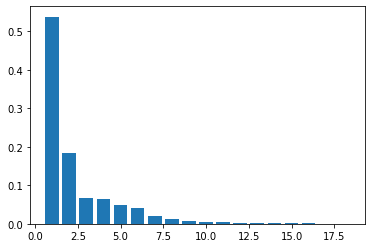

In [56]:
plt.bar(list(range(1,19)),pca_model.explained_variance_ratio_)
plt.show()

Text(0, 0.5, 'Explained variance')

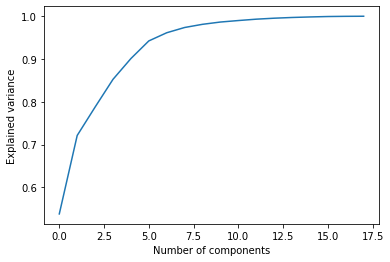

In [57]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

- from the above 2 graphs we can see that the values does not change much after 7 components and there is no steep decline and the curve seems flat.
- in the bar we can clearly notice 7 seems to have been the last to influence the curve much and the rest almost looks flat.
- so we will choose 7 as the number of components

In [58]:
pca_model1 = PCA(n_components = 7)
pca_model1.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
for n in range(0, 7):
    print(f"Variance explained by the first {n+1} principal components = {np.cumsum(pca_model1.explained_variance_ratio_ *100)[n]:.1f}%")

Variance explained by the first 1 principal components = 53.8%
Variance explained by the first 2 principal components = 72.1%
Variance explained by the first 3 principal components = 78.8%
Variance explained by the first 4 principal components = 85.2%
Variance explained by the first 5 principal components = 90.1%
Variance explained by the first 6 principal components = 94.2%
Variance explained by the first 7 principal components = 96.1%


Text(0, 0.5, 'Explained variance')

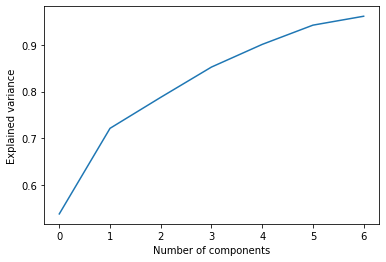

In [61]:
plt.plot(np.cumsum(pca_model1.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

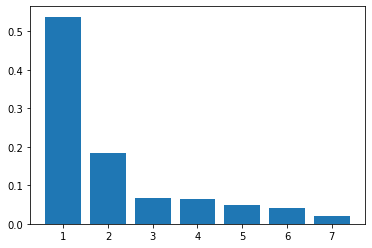

In [62]:
plt.bar(list(range(1,8)),pca_model1.explained_variance_ratio_)
plt.show()

- we can notice the above graph displaying the 7 features giving us 95% of the variance

In [63]:
Pca1 = pca_model1.transform(X_scaled)
Pca1.shape

(846, 7)

- fiting the Scaled data in the SVM and checking its accuracy

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = .30, random_state = 10)

svm = SVC()
svm.fit(X_train,y_train)
print("train accuracy of svm on raw data: "+str(svm.score(X_train,y_train)))
print("test accuracy of svm on raw data: "+str(svm.score(X_test,y_test)))

train accuracy of svm on raw data: 0.972972972972973
test accuracy of svm on raw data: 0.9566929133858267


- lets first the PCA data and check the accuracy

In [68]:
X_train, X_test, y_train, y_test = train_test_split(Pca1, y , test_size = .30, random_state = 10)

pca_svm = SVC()
pca_svm.fit(X_train, y_train)
print("Train Accuracy on PCA data: "+ str(pca_svm.score(X_train,y_train)))
print("Test Accuracy on PCA data: "+ str(pca_svm.score(X_test,y_test)))

Train Accuracy on PCA data: 0.9628378378378378
Test Accuracy on PCA data: 0.9251968503937008


In [69]:
SVM_CrossVal_scores = cross_val_score(svm, Pca1, y, cv=10)
print("10-fold cross val avg performance: "+str(SVM_CrossVal_scores.mean()))

10-fold cross val avg performance: 0.9278919860627177


### Conclusion

When comparing the SVM with all 18 features and SVM with PCA components with 7 features.
The accuracy in train and test set of SVM with 18 features is 0.9729 and 0.9566 respectively which is little higher than the accuracy in train and test with pca components 0.9628 and 0.9251 respectively , but the dimentionailty reduction which brings down the computation cost of the pca components. 

#### PCA component SVM with k fold cross validation score 0.9278 is a better model than the previous SVM with 18 features